In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [2]:
img = cv2.imread('assets/color_card.jpg')
img2 = cv2.imread('assets/color_card2.PNG')
# plt.imshow(img)
# cv2.imshow("Original", img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

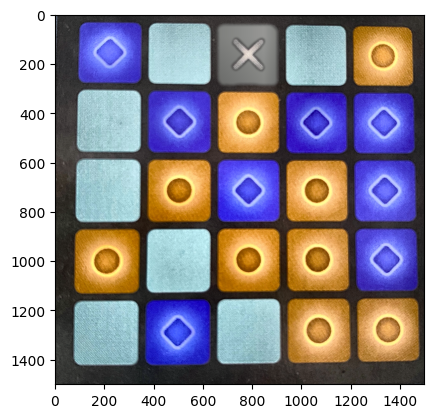

[100 144 149]


In [3]:
# this block is used to try and remove brightness/lighting problems
def preprocess_img(img):
  # Convert the image to LAB color space
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  # Split the LAB image into its 3 channels
  l, a, b = cv2.split(lab)

  # Apply CLAHE to the L channel
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  cl = clahe.apply(l)

  # increase brightnes of iamge
  limg = cv2.merge((cl,a,b))

  # Convert the image back to BGR color space
  processed_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

  return processed_img 

# Show the result
processed_img = preprocess_img(img[200:1400, 275:1400])
processed_img2 = preprocess_img(img2[250:1750, 250:1750])
# plt.imshow(processed_img)
plt.imshow(processed_img2)
plt.show()
print(processed_img2[1300, 100])


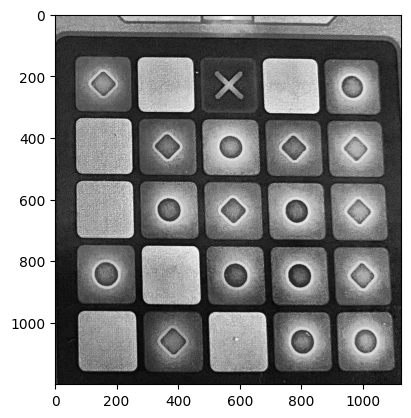

In [4]:
gray_processed = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_processed, cmap="gray", vmin=0, vmax=255)

In [5]:
lower_blue = np.array([100,150,50])
upper_blue = np.array([140,255,255])

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

lower_beige = np.array([20, 10, 150])
upper_beige = np.array([40, 70, 255])

# [169 215 227]
# [100 144 149]


# lower was originally 0, 0, 0
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 30])
lower_gray = np.array([50], dtype=np.uint8)
upper_gray = np.array([150], dtype=np.uint8)




In [6]:
# convert images to HSV standard
red_img = cv2.cvtColor(processed_img2.copy(), cv2.COLOR_BGR2HSV)
blue_img = cv2.cvtColor(processed_img2.copy(), cv2.COLOR_BGR2HSV)
beige_img = cv2.cvtColor(processed_img2.copy(), cv2.COLOR_BGR2HSV)
gray_img = cv2.cvtColor(processed_img2.copy(),  cv2.COLOR_BGR2HSV)

# find each individual color
red_mask = cv2.inRange(red_img, lower_red, upper_red)
blue_mask = cv2.inRange(blue_img, lower_blue, upper_blue)
beige_mask = cv2.inRange(beige_img, lower_beige, upper_beige)
gray_mask = cv2.inRange(gray_img, lower_gray, upper_gray)

# this isolates the colored squares on the board --> still need to find the black square somehow
# isolated_colors = cv2.bitwise_and(img[200:1400, 275:1400], img[200:1400, 275:1400], mask=combined_mask)
# isolated_colors = cv2.bitwise_and(processed_img2, processed_img2, mask=combined_mask)

# plt.imshow(isolated_colors)

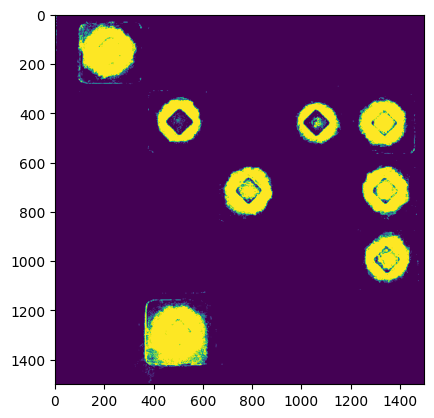

In [7]:
plt.imshow(red_mask)

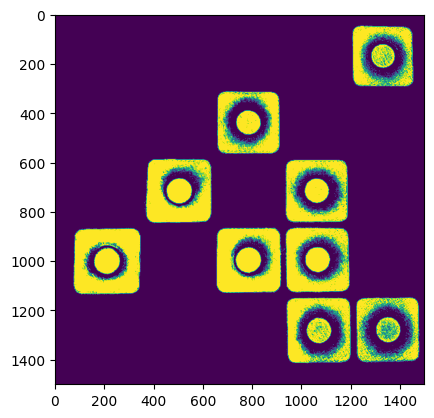

In [8]:
plt.imshow(blue_mask)


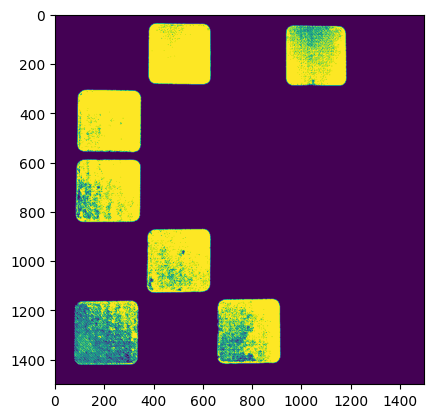

In [9]:
plt.imshow(beige_mask)


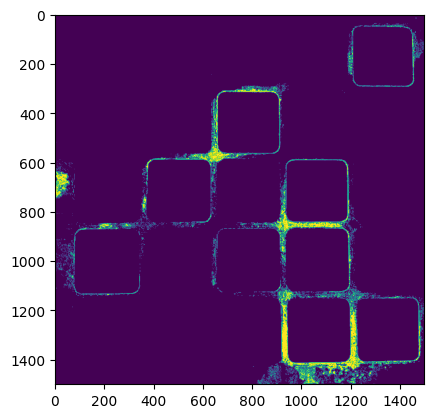

In [10]:
plt.imshow(gray_mask)


In [11]:

gray_orig = cv2.cvtColor(img.copy()[200:1400, 275:1400], cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(processed_img2.copy(), cv2.COLOR_BGR2GRAY)
cropped_img =  cv2.cvtColor(img2[250:1750, 250:1750], cv2.COLOR_BGR2GRAY)

[(5, 379, 36), (16, 97, 37), (9, 663, 44), (6, 935, 45), (15, 1212, 54), (4, 88, 306), (7, 663, 317), (22, 397, 319), (20, 1217, 324), (24, 970, 352), (2, 83, 586), (17, 382, 593), (11, 664, 595), (8, 942, 596), (14, 1220, 599), (3, 371, 871), (13, 944, 873), (18, 675, 873), (19, 1225, 874), (21, 94, 884), (1, 657, 1154), (12, 1230, 1156), (10, 949, 1157), (0, 76, 1162), (23, 397, 1188)]


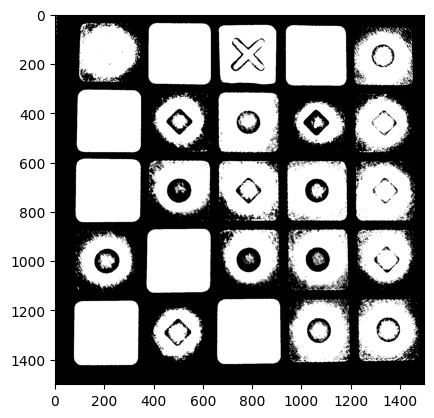

In [15]:

# plt.imshow(gray_orig, cmap="gray", vmin=0, vmax=255)
img_h,img_w = gray_img2.shape
background_thresh = gray_img2[0][0]
# ADD_THRESH = 90
blur = cv2.GaussianBlur(gray_img2,(5,5),0)
# + ADD_THRESH
total_thresh = background_thresh
_,thresh_img = cv2.threshold(blur,total_thresh,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap="gray", vmin=0, vmax=255)
contours, hier = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# and cv2.contourArea(x) > (img_h * img_w)/385
#cv2.contourArea(x) < (img_h * img_w)/25 
top_25_contours = sorted(contours, key=lambda x : cv2.contourArea(x) if cv2.contourArea(x) < (img_h * img_w)/25 else 0,reverse=True)[:25]

# sort x and y later
coords_and_index = []
for i,contour in enumerate(top_25_contours):
    x, y, _, _ = cv2.boundingRect(contour)
    coords_and_index.append((i,x,y))
# print(coords_and_index)
# sort by y
sorted_y = sorted(coords_and_index,key=lambda x:x[2])
print(sorted_y)
# sort by x
for i in range(5):
    sorted_y[5 * i:5* (i + 1)] = sorted(sorted_y[5 * i:5* (i + 1)], key=lambda x:x[1])
top_25_sorted = [top_25_contours[i[0]] for i in sorted_y]
# print(top_25_sorted)

0 97 37
1 379 36
2 663 44
3 935 45
4 1212 54
5 88 306
6 397 319
7 663 317
8 970 352
9 1217 324
10 83 586
11 382 593
12 664 595
13 942 596
14 1220 599
15 94 884
16 371 871
17 675 873
18 944 873
19 1225 874
20 76 1162
21 397 1188
22 657 1154
23 949 1157
24 1230 1156


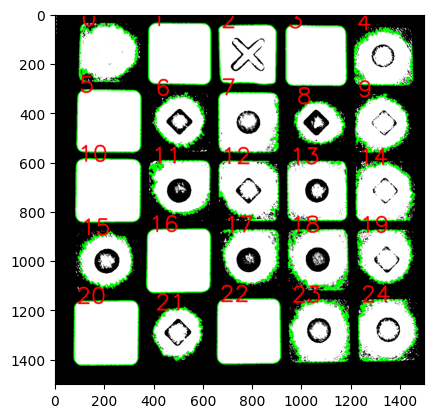

In [16]:
print_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(print_img, top_25_contours, -1, (0, 255, 0), 3)

font = cv2.FONT_HERSHEY_SIMPLEX

fontScale = 3
color = (255, 0, 0)
thickness = 5
for i, place in enumerate(sorted_y):  
    print(i, place[1], place[2])
    cv2.putText(print_img, str(i), (place[1] + 10,place[2] + 10), font, 
                   fontScale, color, thickness, cv2.LINE_AA)

# imS = cv2.resize(print_img, (960, 540)) 
plt.imshow(print_img)

In [17]:
# this stores the color of each respective square
colors = []
hsv_cropped_img = cv2.cvtColor(img2[250:1750, 250:1750].copy(), cv2.COLOR_BGR2HSV)
# lower_red = np.array([0, 50, 50])
# upper_red = np.array([100, 120, 255])
# lower_blue = np.array([100, 0, 0])
# upper_blue = np.array([255, 100, 50])
# lower_beige = np.array([100, 120, 100])
# upper_beige = np.array([230, 200, 170])
# lower_black = np.array([100, 100, 100])
# upper_black = np.array([140, 140, 140])
lower_blue = np.array([100,150,50])
upper_blue = np.array([140,255,255])

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

lower_beige = np.array([20, 10, 150])
upper_beige = np.array([40, 80, 255])

# [169 215 227]
# [100 144 149]


# lower was originally 0, 0, 0
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 30])
lower_gray = np.array([50], dtype=np.uint8)
upper_gray = np.array([150], dtype=np.uint8)
for i, place in enumerate(sorted_y):
    color = hsv_cropped_img[place[2]+90, place[1]+90]
    if all(color <= upper_red) and all(color >= lower_red):
        colors.append((i, "red"))
    # elif all(color <= upper_black) and all(color >= lower_black):
    #     colors.append((i, "black"))
    elif all(color <= upper_blue) and all(color >= lower_blue):
        colors.append((i, "blue"))
    elif all(color <= upper_beige) and all(color >= lower_beige):
        colors.append((i, "beige"))
    else:
        colors.append((i, "black"))
    print(colors[i])

(0, 'red')
(1, 'beige')
(2, 'black')
(3, 'beige')
(4, 'blue')
(5, 'beige')
(6, 'red')
(7, 'blue')
(8, 'red')
(9, 'red')
(10, 'beige')
(11, 'blue')
(12, 'red')
(13, 'blue')
(14, 'red')
(15, 'blue')
(16, 'beige')
(17, 'blue')
(18, 'blue')
(19, 'red')
(20, 'beige')
(21, 'red')
(22, 'beige')
(23, 'blue')
(24, 'blue')
